In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,RegexpTokenizer
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,roc_curve,precision_score,recall_score,f1_score,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [31]:
tweets_df  = pd.read_csv('Disaster_Tweets.csv') 
tweets_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [32]:
y = tweets_df['target']
tweets_df.drop(columns='target',inplace=True)

In [33]:
tweets_df

,id,keyword,location,text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...
...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...


In [34]:
tweets_df['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [35]:
# dropping columns with unique values and same values

cols_to_drop = []
for col in tweets_df.columns:
    if len(tweets_df[col].value_counts()) == 1 or len(tweets_df[col].value_counts()) == tweets_df.shape[0] :
        cols_to_drop.append(col)
cols_to_drop

['id']

In [36]:
tweets_df.drop(columns='id', inplace = True)


In [37]:
tweets_df

,keyword,location,text
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...
1,NaN,NaN,Forest fire near La Ronge Sask. Canada
2,NaN,NaN,All residents asked to 'shelter in place' are ...
3,NaN,NaN,"13,000 people receive #wildfires evacuation or..."
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...
...,...,...,...
7608,NaN,NaN,Two giant cranes holding a bridge collapse int...
7609,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...
7610,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,NaN,NaN,Police investigating after an e-bike collided ...


In [38]:
X_train,X_test,y_train,y_test = train_test_split(tweets_df,y,test_size=0.2,random_state =32)

In [39]:
tokenizer = RegexpTokenizer(r'\w+') #Matches any alphanumeric character
lemmatizer = WordNetLemmatizer()

In [40]:
#function to preprocess/clean data
def clean_data(tweet):
    tokens = tokenizer.tokenize(tweet) # generates tokens
    pure_tokens = [token.lower() for token in tokens if token.lower() not in stopwords.words('english')] #stopwords removal
    lemmatized_tokens = [lemmatizer.lemmatize(token,pos='v') for token in pure_tokens] # Reduces to its dictionary form
    return ' '.join(lemmatized_tokens)
    

In [41]:
X_train

,keyword,location,text
5748,riot,"Uppsala, Sweden",Seriously do we have to do a tactical riot aga...
6252,snowstorm,Porthcawl,I liked a @YouTube video http://t.co/z8Cp77lVz...
3926,flood,USA,Motors Hot Deals #452 &gt;&gt; http://t.co/ED3...
3742,fire,2 high 2 come down,@Miss_HoMaStToPa cause were on fire we are on ...
3779,fire%20truck,NaN,#reno Truck trailer catches fire in Reno http:...
...,...,...,...
4030,forest%20fire,"Redding, California, USA",View of smoke column rising above the south en...
2940,drowned,NaN,Toddler drowned in bath after mum left room to...
1334,burning%20buildings,we?it Û¢ ixwin,@Louis_Tomlinson incredible? THE CHILDREN WERE...
1579,cliff%20fall,NaN,Currently want to drive my car off a cliff and...


In [42]:
clean_data(X_train['text'][0])

'deeds reason earthquake may allah forgive us'

In [43]:
X_train['cleaned_text'] = X_train['text'].apply(clean_data)
X_test['cleaned_text'] = X_test['text'].apply(clean_data)

In [44]:
X_train['cleaned_text']

5748    seriously tactical riot headquarter disney marvel
6252    like youtube video http co z8cp77lvza boeing 7...
3926    motor hot deal 452 gt gt http co ed32pbvio7 10...
3742    miss_homasttopa cause fire fire fire yeah fire...
3779    reno truck trailer catch fire reno http co k5f...
                              ...                        
4030    view smoke column rise south end blake fire al...
2940    toddler drown bath mum leave room fetch pyjama...
1334    louis_tomlinson incredible children scream bui...
1579            currently want drive car cliff fall death
2775    70 years atomic bomb japan still struggle war ...
Name: cleaned_text, Length: 6090, dtype: object

In [45]:
tfidf = TfidfVectorizer()
X_train_tfidf=tfidf.fit_transform(X_train['cleaned_text'])
X_test_tfidf=tfidf.transform(X_test['cleaned_text'])
X_train_tfidf

<6090x16752 sparse matrix of type '<class 'numpy.float64'>'
	with 65485 stored elements in Compressed Sparse Row format>

In [46]:
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Logistic Regression

In [47]:
logreg = LogisticRegression()
logreg.fit(X_train_tfidf,y_train)
print('train score =',logreg.score(X_train_tfidf,y_train))
print('test score =',logreg.score(X_test_tfidf,y_test))

train score = 0.8916256157635468
test score = 0.7971109652002626


In [48]:
test_predictions = logreg.predict(X_test_tfidf)
test_predictions

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [49]:
confusion_matrix(y_test,test_predictions)

array([[772, 128],
       [181, 442]], dtype=int64)

In [50]:
comparision_df = pd.DataFrame({'Tweet':X_test['text'],'Actuals':y_test,'predictions':test_predictions})
comparision_df

,Tweet,Actuals,predictions
2250,Why are you deluged with low self-image? Take ...,1,0
7155,Bedroom clean bathroom clean laundry done .....,0,0
3148,UPDATE: Indiana State Police reopening I-65 ne...,1,1
1857,Had a minute alone with my crush??...it was an...,0,0
4760,Lightning causes six new fires on VancouveråÊI...,1,1
...,...,...,...
968,Check out Vintage Longaberger Floral Fabric Sh...,0,0
4586,The injuries are starting!!! Please @dallascow...,0,0
2371,@BV Bloomberg will publish anything negative t...,0,0
1797,@DestinyTheGame @Bungie @PlayStation Getting k...,0,0


In [51]:
probability = logreg.predict_proba(X_test_tfidf) 
pos_probability = logreg.predict_proba(X_test_tfidf)[::,1]
pos_probability 

array([0.3102626 , 0.38681377, 0.79499271, ..., 0.36016808, 0.20737868,
       0.14196361])

In [52]:
fpr,tpr,thresholds = roc_curve(y_test,pos_probability )

Text(0, 0.5, 'True Positive rate')

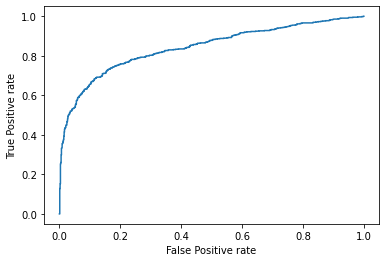

In [53]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')

In [54]:
#test scores
print('precision score',precision_score(y_test,test_predictions))
print('recall score',recall_score(y_test,test_predictions))
print('test f1_score :',f1_score(y_test,test_predictions))

precision score 0.775438596491228
recall score 0.709470304975923
test f1_score : 0.7409891031014251


In [55]:
 roc_auc_score(y_test,test_predictions)

0.7836240413768504

# Support Vector Machine

In [58]:
svm = SVC(C=1.0,kernel='linear')
svm.fit(X_train_tfidf,y_train)
svm_predicts = svm.predict(X_test_tfidf)
svm_predicts

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [59]:
confusion_matrix(y_test,svm_predicts)

array([[765, 135],
       [170, 453]], dtype=int64)

In [60]:
print('support vector machine precision score',precision_score(y_test,svm_predicts))
print('support vector machine recall score',recall_score(y_test,svm_predicts))
print('support vector machine f1_score :',f1_score(y_test,svm_predicts))
print('support vector machine roc_auc_score',roc_auc_score(y_test,svm_predicts))

support vector machine precision score 0.7704081632653061
support vector machine recall score 0.7271268057784912
support vector machine f1_score : 0.7481420313790257
support vector machine roc_auc_score 0.7885634028892456


# Hyperparameter Tuning - RandomizedSearch CV

In [64]:
hp_svm_dict = {
               'C':[0.6,0.8,1.0],
               'kernel':['linear', 'poly', 'rbf', 'sigmoid']
              }

In [65]:
rdcv_svm = RandomizedSearchCV(svm,hp_svm_dict,cv=3,scoring='f1',n_iter=100)
rdcv_svm.fit(X_train_tfidf,y_train)
rdcv_svm.predict(X_test_tfidf)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [66]:
print('the best estimates for the parameters are ',rdcv_svm.best_estimator_)
print('the f1 score is ',rdcv_svm.best_score_)
print('the best parameters are ',rdcv_svm.best_params_)

the best estimates for the parameters are  SVC(kernel='linear')
the f1 score is  0.7342203170104931
the best parameters are  {'kernel': 'linear', 'C': 1.0}
